# Exploratory Data Analysis (EDA) for NIFTY Feature-Engineered Data

This notebook helps you explore and visualize the features created for NIFTY data.

- Data: `data/nifty/train/full_featured.csv`
- Libraries: pandas, numpy, matplotlib, seaborn

---

In [19]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
%matplotlib inline

In [20]:
# 2. Load the feature-engineered data
data_path = '../../data/input/full-featured.csv'
df = pd.read_csv(data_path)
print(f'Loaded {len(df)} rows and {len(df.columns)} columns.')
df.head()

Loaded 3062 rows and 32 columns.


,date,Open,High,Low,Close,volume,turnover,daily_return,log_return,price_range,...,stoch_smoothk,stoch_smoothd,dow_trend_spec_raw,dow_trend_spec,range,avg_range,is_mother_candle,mother_candle_trend,final_trend,trend_code
0,2013-08-01 00:00:00+05:30,5776.90,5808.50,5676.85,5727.85,216762208,7164.04,NaN,NaN,131.65,...,NaN,NaN,Sideways,Sideways,131.65,131.650000,False,Sideways,Sideways,1
1,2013-08-02 00:00:00+05:30,5750.05,5761.85,5649.00,5677.90,222494469,6350.26,-0.008721,-0.008759,112.85,...,NaN,NaN,Downtrend,Downtrend,112.85,122.250000,False,Sideways,Downtrend,0
2,2013-08-05 00:00:00+05:30,5682.40,5721.00,5661.50,5685.40,197167952,5575.21,0.001321,0.001320,59.50,...,NaN,NaN,Sideways,Downtrend,59.50,101.333333,False,Sideways,Sideways,1
3,2013-08-06 00:00:00+05:30,5664.90,5664.90,5521.80,5542.25,216227972,6424.42,-0.025179,-0.025501,143.10,...,NaN,NaN,Downtrend,Downtrend,143.10,111.775000,True,Sideways,Downtrend,0
4,2013-08-07 00:00:00+05:30,5549.30,5561.45,5486.85,5519.10,245010773,7725.23,-0.004177,-0.004186,74.60,...,NaN,NaN,Downtrend,Downtrend,74.60,104.340000,False,Downtrend,Downtrend,0


## 3. Summary statistics and missing values

In [21]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3062.0,1.362821e+04,5.873871e+03,5.233450e+03,8.613300e+03,1.135233e+04,1.788342e+04,2.632580e+04
High,3062.0,1.369069e+04,5.895661e+03,5.317700e+03,8.655388e+03,1.138715e+04,1.794711e+04,2.632580e+04
Low,3062.0,1.354605e+04,5.849748e+03,5.118850e+03,8.553538e+03,1.126460e+04,1.777972e+04,2.617240e+04
Close,3062.0,1.361987e+04,5.873622e+03,5.285000e+03,8.610175e+03,1.132102e+04,1.785706e+04,2.621605e+04
volume,3062.0,3.088143e+08,1.819561e+08,9.774392e+06,1.897090e+08,2.558334e+08,3.631358e+08,1.811564e+09
turnover,3062.0,1.903989e+04,1.110057e+04,3.736600e+02,9.027865e+03,1.810536e+04,2.605910e+04,9.378644e+04
daily_return,3061.0,5.443258e-04,1.019231e-02,-1.298046e-01,-4.180956e-03,6.937086e-04,5.877517e-03,8.763205e-02
log_return,3061.0,4.919154e-04,1.024639e-02,-1.390375e-01,-4.189720e-03,6.934681e-04,5.860312e-03,8.400291e-02
price_range,3062.0,1.446378e+02,1.039151e+02,2.130000e+01,7.827500e+01,1.176500e+02,1.819125e+02,1.898050e+03
ma_5,3058.0,1.361703e+04,5.864341e+03,5.385830e+03,8.617127e+03,1.133231e+04,1.784572e+04,2.616635e+04


In [22]:
# Missing values
missing = df.isnull().sum()
missing[missing > 0]

daily_return              1
log_return                1
ma_5                      4
ma_20                    19
volatility_5              5
volatility_20            20
Volume_Avg               19
SMA_200                 199
rsi_14                   13
macd_12_26               25
macd_signal_12_26        33
macd_histogram_12_26     33
macd_signal_strength     33
stoch_14                 13
stoch_smoothk            15
stoch_smoothd            17
dtype: int64

## 4. Distribution plots for key features

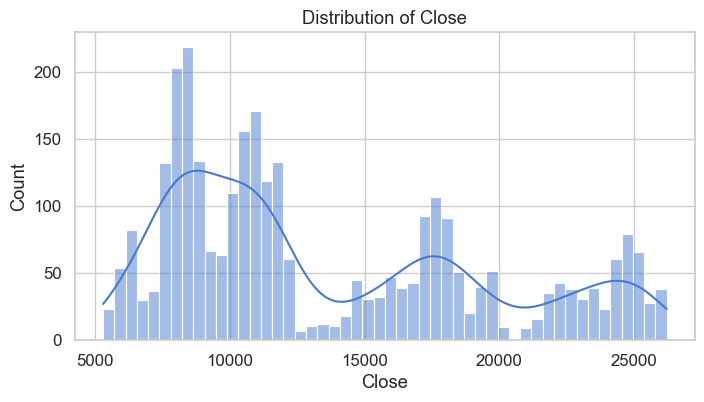

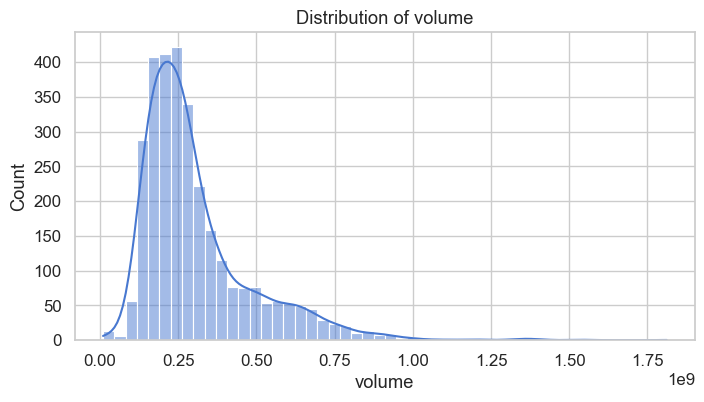

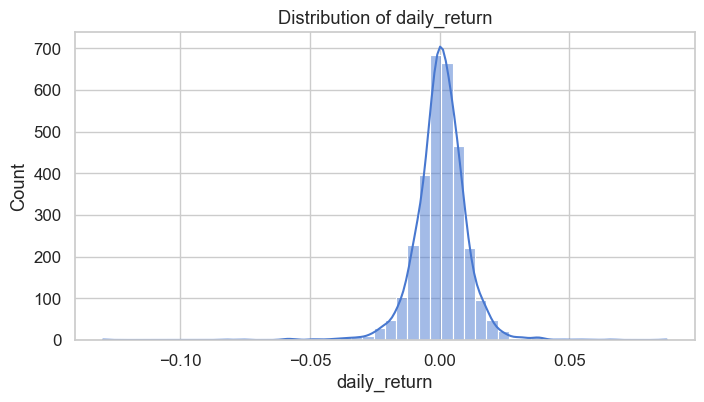

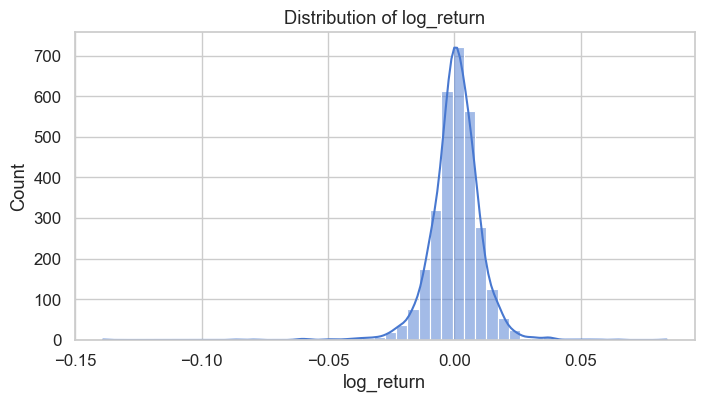

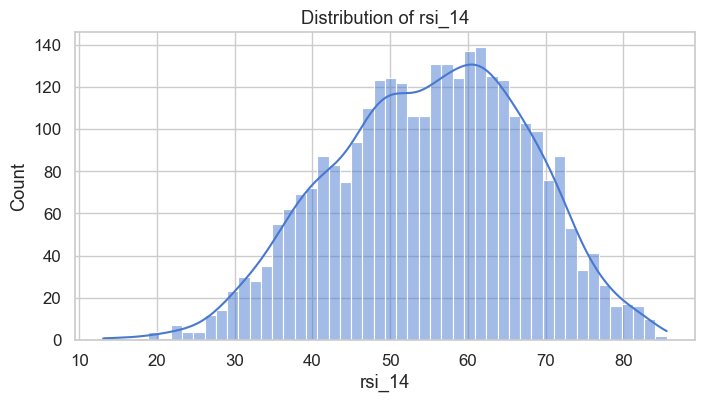

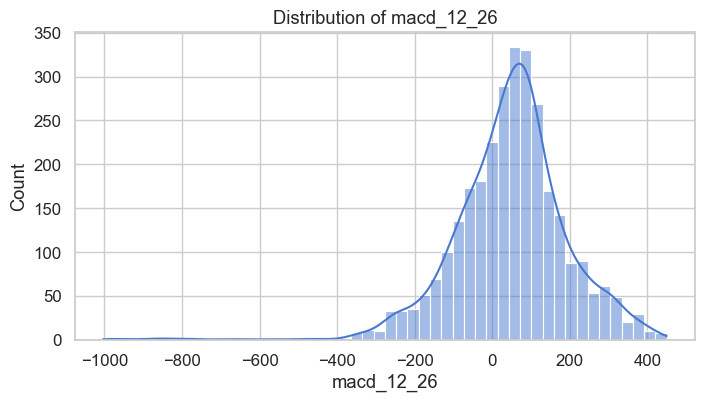

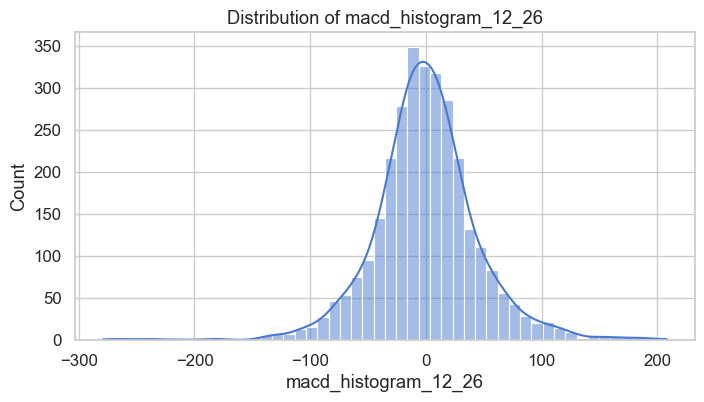

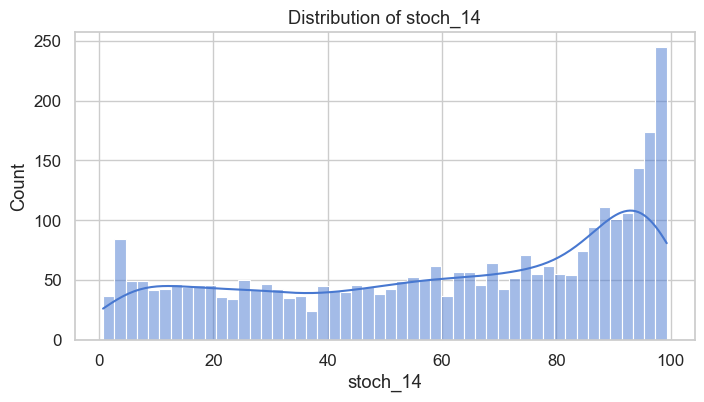

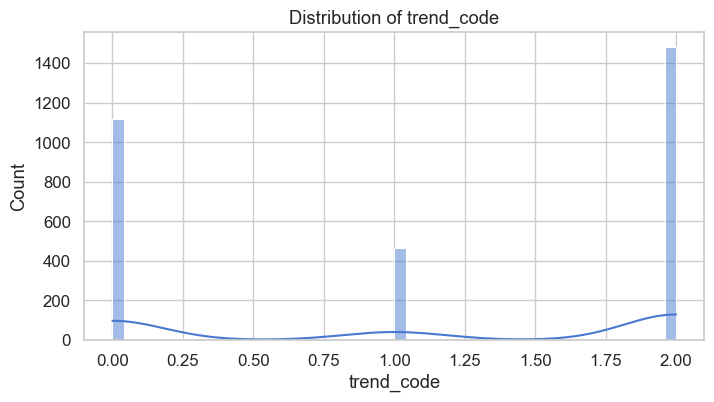

In [23]:
# Select a few key features for distribution plots
features = ['Close', 'volume', 'daily_return', 'log_return', 'rsi_14', 'macd_12_26', 'macd_histogram_12_26', 'stoch_14','trend_code']
for feat in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feat].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {feat}')
    plt.show()

## 5. Correlation heatmap

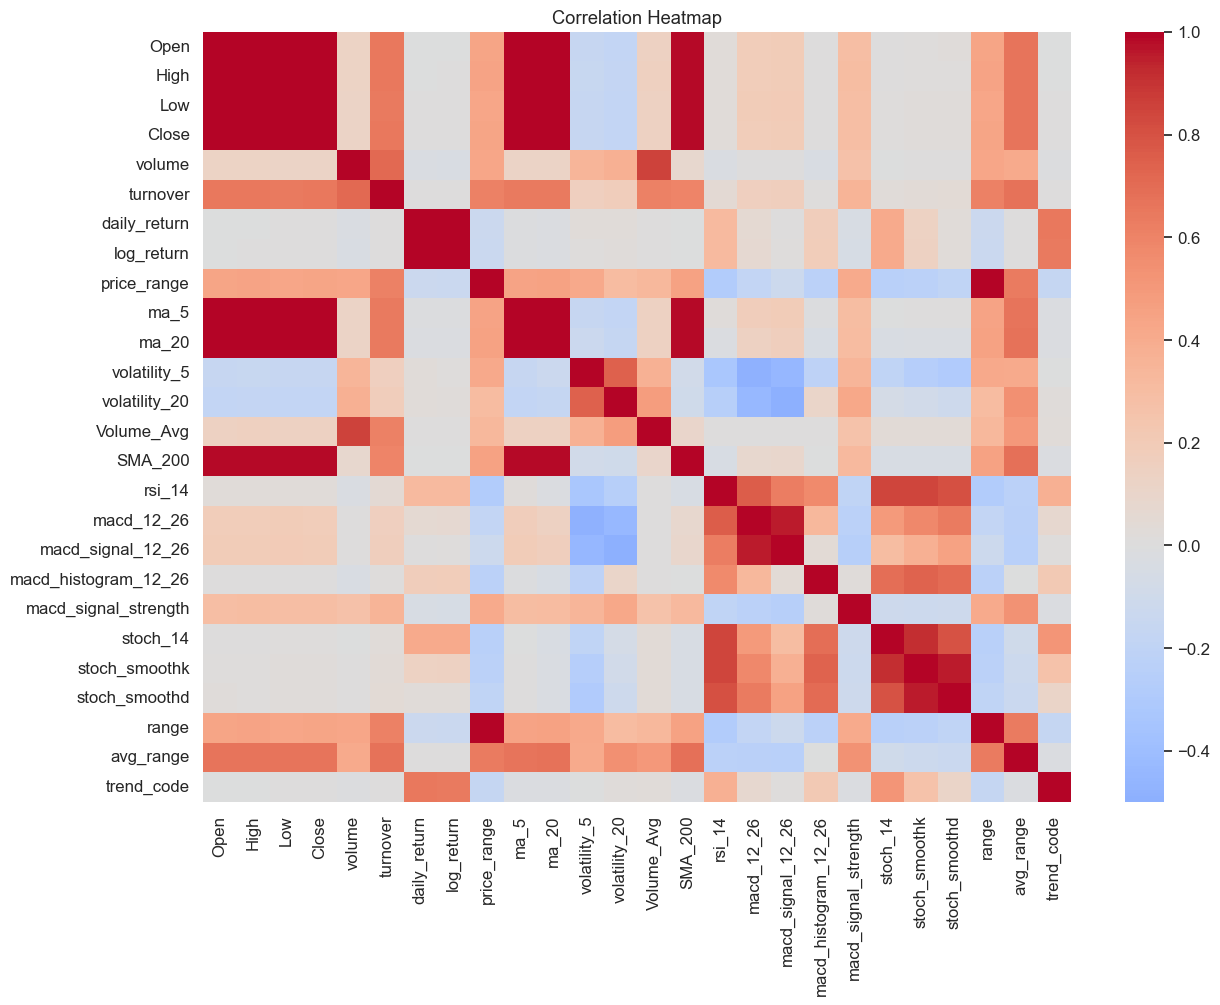

In [24]:
# Compute correlation matrix for numeric features only
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## 6. Time series plots for price and selected features

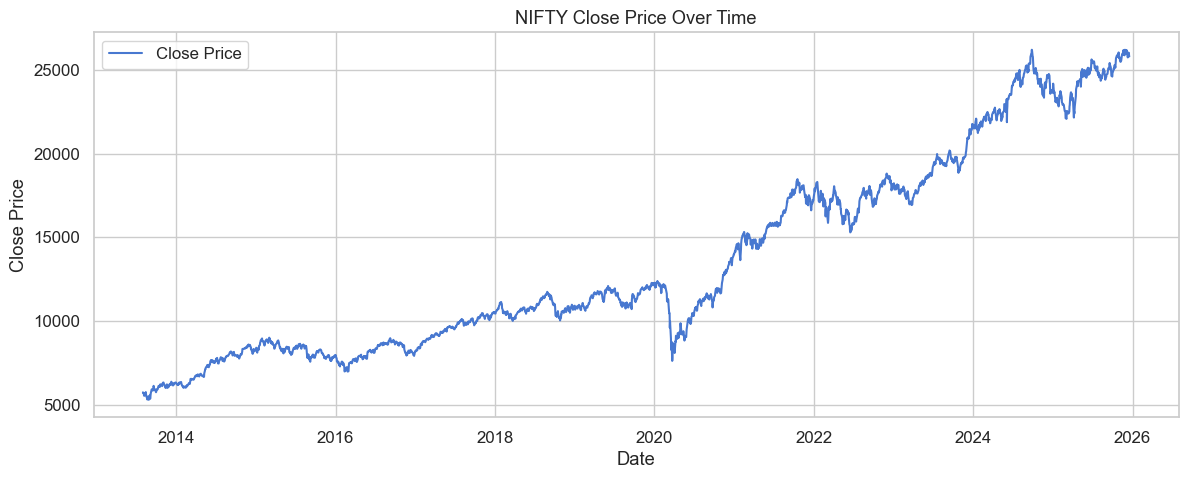

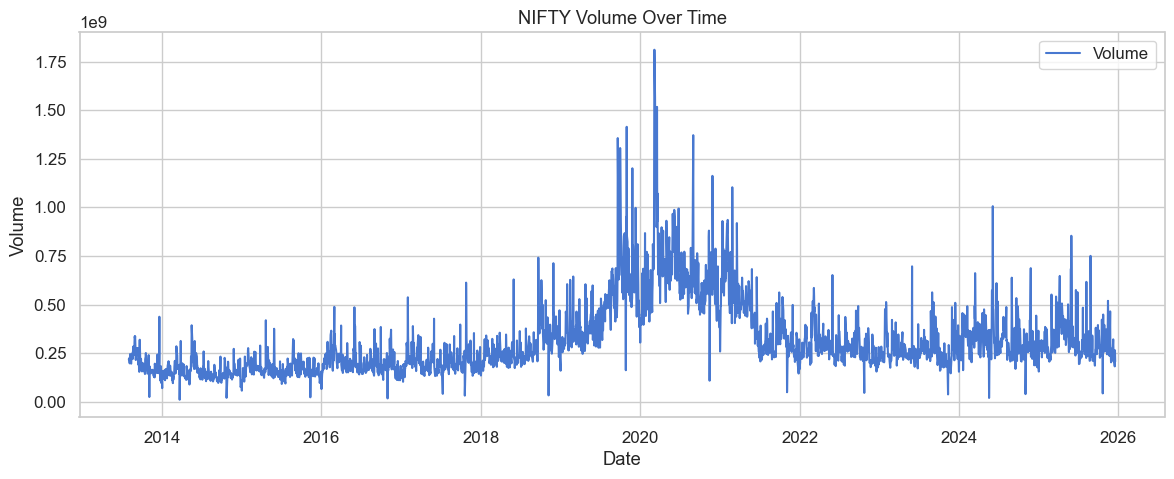

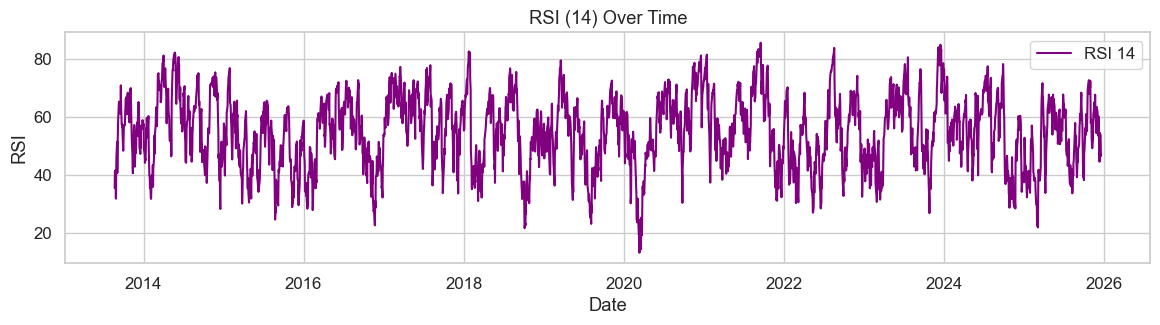

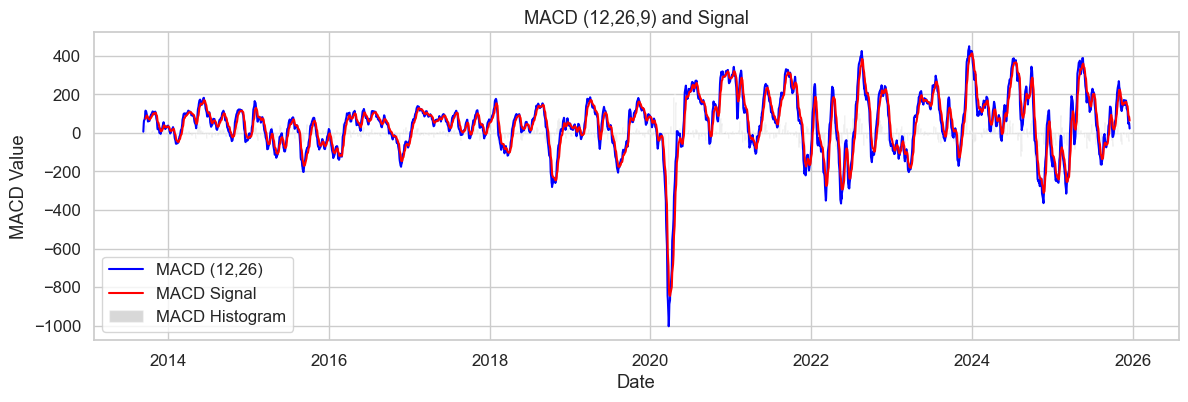

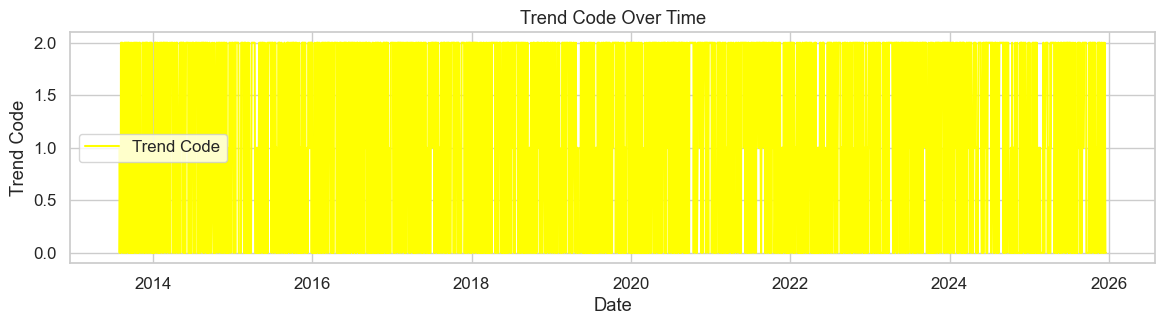

In [25]:
# Convert date column to datetime if not already
if not np.issubdtype(df['date'].dtype, np.datetime64):
    df['date'] = pd.to_datetime(df['date'])

# Plot close price
plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['Close'], label='Close Price')
plt.title('NIFTY Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Plot Volume
plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['volume'], label='Volume')
plt.title('NIFTY Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['date'], df['rsi_14'], label='RSI 14', color='purple')
plt.title('RSI (14) Over Time')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot MACD and Signal
plt.figure(figsize=(14, 4))
plt.plot(df['date'], df['macd_12_26'], label='MACD (12,26)', color='blue')
plt.plot(df['date'], df['macd_signal_12_26'], label='MACD Signal', color='red')
plt.bar(df['date'], df['macd_histogram_12_26'], label='MACD Histogram', color='gray', alpha=0.3)
plt.title('MACD (12,26,9) and Signal')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()


# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['date'], df['trend_code'], label='Trend Code', color='yellow')
plt.title('Trend Code Over Time')
plt.xlabel('Date')
plt.ylabel('Trend Code')
plt.legend()
plt.show()

You can add more plots and analysis as you explore the data!
If you want to visualize other features, just add more cells.